# Eigenvalue problems

In eigenvalue problem, we arrive at a system of equation $(A-\lambda I)X=0$ in which $\lambda$ is an eigenvalue and $X$ is the corresponding eigenvectors of the matrix $A$. To obtain the eigenvalues and eigenvectors we use the [eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) function of `numpy.linalg` library.

### Example

Find the eigenvalues and eigenvectors of \begin{equation}[A]=
\begin{bmatrix}
40 & -20 & 0 \\
-20 & 40 & -20 \\
0 & -20 & 40
\end{bmatrix}
\end{equation}

In [ ]:
import numpy as np
from numpy.linalg import eig
A = np.array([[40.,-20., 0.],[-20.,40.,-20.], [0.,-20.,40.]])
e, v = eig(A)  #e: eigenvalues, v: the correponding eigenvectors
print('eigenvalues = \n', e,'\n')
print('eigenvectors = \n', v,'\n')
print()
for i in range(3):
  print('For eigenvalue =', e[i], ' the eigenvector is ', v[:,i])

eigenvalues = 
 [68.28427125 40.         11.71572875] 

eigenvectors = 
 [[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01 -1.28369537e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]] 


For eigenvalue = 68.28427124746185  the eigenvector is  [-0.5         0.70710678 -0.5       ]
For eigenvalue = 40.00000000000001  the eigenvector is  [-7.07106781e-01 -1.28369537e-16  7.07106781e-01]
For eigenvalue = 11.715728752538103  the eigenvector is  [0.5        0.70710678 0.5       ]


Let's check the results to make sure that the eigenvalues and eigenvectors obtained satisfy $(A-\lambda I)X=0$

In [ ]:
for i in range(3):
  print('Check: ([A]-e[i])[v] = ', np.dot(A - e[i] * np.identity(3),v[:,i]),' ~ [0, 0, 0]')  #identity(3) creates a 3x3 identity matrix


Check: ([A]-e[i])[v] =  [-4.79616347e-14  2.66453526e-14 -2.84217094e-14]  ~ [0, 0, 0]
Check: ([A]-e[i])[v] =  [ 7.59168661e-15  3.55271368e-15 -2.45690512e-15]  ~ [0, 0, 0]
Check: ([A]-e[i])[v] =  [-1.42108547e-14  1.77635684e-15  0.00000000e+00]  ~ [0, 0, 0]


The results are almost zeros (except for the round-off error).

### Example
The curvature of a slender column subject to an axial load $P$ (Figure) can be modeled by $\frac{d^{2} y}{dx^{2}}+r^{2} y=0$ where $r^{2}=\frac{P}{EI}$ in which $E$ is the modulus of elasticity and $I$ is the moment of inertia of the cross section about its neutral axis; $y$ is the displacement due to the load. The length of the column is $L$ and the boundary conditions are $y(0)=y(L)=0$, indicating no displacement at both ends of the column.

This model can be converted into an eigenvalue problem by substituting a centered finite-difference approximation for the second derivative to obtain the finite-difference equation $\frac{y_{i-1}-2y_{i}+y_{i+1}}{\Delta x^2}+r^2y_{i}=0$. This is an eigenvalue problem in which the solution depends on the value of $r^2$ which is not known a priori. We consider $4$ internal nodes along the column as
$x_0=0$ | $x_1=\Delta x$ | $x_2=2\Delta x$ | $x_3=3\Delta x$ | $x_4=4\Delta x$ | $x_5=5\Delta x=L$
--- | ---            | --- | --- | ---| ---
$y_0=0$|$y_1$            |$y_2$            |$y_3$            |$y_4$ | $y_5=0$            

where the displacements ($y=y_{1}, \ldots,y_{4}$) of $4$ internal nodes along the column are located at $x=x_{1},\ldots,x_{4}$. Writing the finite-difference equation for nodes $i=1,\ldots,4$ we obtain the system of equations
\begin{equation}
\begin{bmatrix}
(2-\Delta x^{2}r^{2})& -1 & 0 &0 \\
-1 & (2-\Delta x^{2}r^{2}) & -1 & 0\\
0 & -1 & (2-\Delta x^{2}r^{2})& -1 \\
 0& 0 & -1 & (2-\Delta x^{2}r^{2}) \\
\end{bmatrix}
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
\end{bmatrix}=
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
\end{equation}
which presents an eigenvalue problem with eigenvalues $\lambda=r^2\Delta x^2$. 

Consider an axially loaded wooden column with the following characteristics: $E = 10^{10}$ $\rm{N/m^2}$, $I = 1.25 \times 10^{-5}$ $\rm{m^4}$, and $L = 3$ $\rm{m}$. We have $\Delta x=L/5$ which yields $x_{i}=i\Delta x$ for $i=1,\ldots,4$. Determine the eigenvalues and eigenvectors. Find the load $P$ corresponding to each eigenvalue in kN. Plot the displacement along the column for each load.


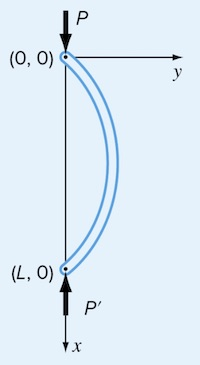

eigenvalues = 
 [3.61803399 2.61803399 0.38196601 1.38196601] 

eigenvectors (displacements)= 
 [[-0.37174803 -0.60150096 -0.37174803 -0.60150096]
 [ 0.60150096  0.37174803 -0.60150096 -0.37174803]
 [-0.60150096  0.37174803 -0.60150096  0.37174803]
 [ 0.37174803 -0.60150096 -0.37174803  0.60150096]] 

Load [kN]= 
 [1256.26180165  909.03957943  132.62708724  479.84930946]



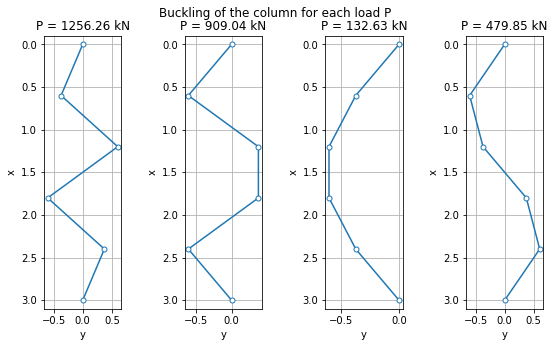

In [ ]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

A = np.array([[2.,-1., 0., 0.],[-1.,2.,-1., 0.], [0.,-1.,2., -1.],[0.,0.,-1.,2.]])
e, v = eig(A)  #e: eigenvalues, v: the correponding eigenvectors
print('eigenvalues = \n', e,'\n')
print('eigenvectors (displacements)= \n', v,'\n')
E = 1e10    # N/m^2
I = 1.25e-5 # m^4
L = 3       # m
dx = L / 5.
r2 = e / dx**2
P = r2 * E * I / 1000.  # kN

print('Load [kN]= \n',P)

x = np.array([float(i) * dx for i in range(6)])  #x location of all nodes (including x=0 and x=L)
y = np.zeros(x.size)   #create y array of zeros with the same size as x

# Plotting
print()
plt.figure(figsize=(8,5))
plt.subplot(141)
y [1:-1] = v[:,0]  #set the internal nodes displacement to the eigenvector corresponding to each eigenvalue (the first and last nodes have y=0)
plt.plot(y, x, 'o-', markersize=5, markerfacecolor='w')
plt.grid(True)
plt.xlabel('y')
plt.ylabel('x')
plt.ylim(np.max(x)+0.1,np.min(x)-0.1)  # showing the plot upside down by switching its max and min limits to look like the picture above
                                       # adding +/- 0.1 to create a margin between the plot and the box on top and bottom
plt.title('P = '+str(np.round(P[0],2))+' kN')  # rounding to 2 decimal places to fit better on top of the plot

plt.subplot(142)
y [1:-1]  = v[:,1]
plt.plot(y, x, 'o-', markersize=5, markerfacecolor='w')
plt.grid(True)
plt.xlabel('y')
plt.ylabel('x')
plt.ylim(np.max(x)+0.1,np.min(x)-0.1)
plt.title('P = '+str(np.round(P[1],2))+' kN')

plt.subplot(143)
y [1:-1]  = v[:,2]
plt.plot(y, x, 'o-', markersize=5, markerfacecolor='w')
plt.grid(True)
plt.xlabel('y')
plt.ylabel('x')
plt.ylim(np.max(x)+0.1,np.min(x)-0.1)
plt.title('P = '+str(np.round(P[2],2))+' kN')

plt.subplot(144)
y [1:-1]  = v[:,3]
plt.plot(y, x, 'o-', markersize=5, markerfacecolor='w')
plt.grid(True)
plt.xlabel('y')
plt.ylabel('x')
plt.ylim(np.max(x)+0.1,np.min(x)-0.1)
plt.title('P = '+str(np.round(P[3],2))+' kN')
plt.suptitle('Buckling of the column for each load P')
plt.tight_layout(pad=2) #put spacing between the subplots
plt.show();



Each graph represents the levels at which the column undergoes displacement into each  buckling configuration for each buckling load. In a practical sense, it is usually the lowest load that is of interest because failure will usually occur when the column first buckles. 

### Exercise

Find the eigenvalues and eigenvectors of \begin{equation}[A]=
\begin{bmatrix}
2 & 8 & 10 \\
8 & 4 & 5 \\
10 & 5 & 7
\end{bmatrix}
\end{equation} and check to make sure they are calculated correctly.